# Rating predictions

user.ratedList
user.rating <-- number of changes will tell us how many contests they've done

- get users who's done at least 11 contests
- \# contests above ELO in the previous x amount of time
- take submission dataframe, take last month above ELO --> get number of questions solved


- how much momentum
 

In [1]:
%matplotlib inline
#%load_ext rpy2.ipython

import requests
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
import sys
import time

## Fn: get user submissions

In [45]:
def getUserSubmissions(handle):
    max_try_count = 5
    tries = 0

    maxcount = '100000000'
    url = 'http://codeforces.com/api/user.status?handle=' + handle + '&from=1&count=' + maxcount

    while tries < max_try_count:
        try:
            r = requests.get(url).json()['result']

            arr = []
            keys = ['testset', 'passedTestCount', 'author', 'relativeTimeSeconds', 
                    'language', 'memoryBytes', 'timeMilliseconds', 'problem_name', 'problem_index',
                    'problem_tags', 'points', 'contestID', 'verdict', 'id', 'participantType', 'startTimeSeconds']

            for rr in r:
                temp = dict.fromkeys(keys)
                temp['author'] = rr['author']['members'][0]['handle']
                temp['startTimeSeconds'] = rr['creationTimeSeconds']
                if 'startTimeSeconds' not in rr['author']:
                    temp['participantType'] = 'GYM'
                else:
                    temp['participantType'] = rr['author']['participantType']
                temp['id'] = rr['id']
                try:
                    temp['verdict'] = rr['verdict']
                except KeyError:
                    print temp
                    sys.exit()
                temp['contestID'] = rr['contestId']
                if 'points' not in rr['problem']:
                    temp['points'] = 0
                else:
                    temp['points'] = rr['problem']['points']
                temp['problem_tags'] = rr['problem']['tags']
                temp['problem_index'] = rr['problem']['index']
                temp['problem_name'] = rr['problem']['name']
                temp['timeMilliseconds'] = rr['timeConsumedMillis']
                temp['memoryBytes'] = rr['memoryConsumedBytes']
                temp['language'] = rr['programmingLanguage']
                temp['relativeTimeSeconds'] = rr['relativeTimeSeconds']
                temp['passedTestCount'] = rr['passedTestCount']
                temp['testset'] = rr['testset']

                arr.append(temp)
            return pd.DataFrame.from_dict(arr)
        except:
            print "error while processing", url
            print "waiting 10 seconds before trying again"
            time.sleep(10)
            tries += 1

            if tries > max_try_count:
                print "max tries exceeded, aborting"
                sys.exit()

## Fn: get user rating history

In [21]:
from time import sleep
def getUserRatingHistory(handle):
    maxtries = 5
    tries = 0
    while tries < maxtries:
        try:
            url = 'http://codeforces.com/api/user.rating?handle=' + handle
            print url
            r = requests.get(url).json()['result']
            return pd.DataFrame.from_dict(r)
        except:
            tries += 1
            sleep(5)
    print "ERROR GETTING USER INFO FOR", handle

## Fn: get contest hacks

In [ ]:
from time import sleep
def getContestHacks(contest):
    maxtries = 5
    tries = 0
    while tries < maxtries:
        try:
            url = 'http://codeforces.com/api/contest.hacks?contestId=' + contest

            r = requests.get(url).json()['result']
            return pd.DataFrame.from_dict(r)
        except:
            tries += 1
            sleep(5)
    print "ERROR GETTING USER INFO FOR CONTEST", contest

## Fn: get list of users

In [4]:
#url = 'http://codeforces.com/api/user.ratedList?activeOnly=true'
url = 'http://codeforces.com/api/user.ratedList'
users = requests.get(url).json()['result']

allHandles = []
for u in users:
    allHandles.append(u['handle'])

In [5]:
len(allHandles)

103417

export to file

In [ ]:
with open('all_handles.txt', 'w') as f:
    for u in allHandles:
        f.write(u + '\n')

# API Calls to get user info 

(0, 2000)

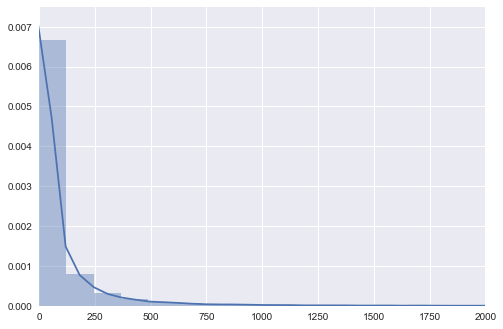

In [39]:
import seaborn as sns
sns.distplot(submission_cnts)
ax = plt.gca()
ax.set_xlim([0, 2000])

In [48]:
lastidx = [i for i,a in enumerate(allHandles) if a=='vbansal027']
print lastidx
print allHandles[lastidx[0]]

[80502]
vbansal027


In [49]:
from os.path import exists
filename = 'all_submissions.csv'
# get user submission history
submission_dfs = []
submission_cnts = []

last_idx = lastidx[0]+1

for idx, user in enumerate(allHandles[last_idx:]):
    df = getUserSubmissions(user)
    submission_cnts.append(df.shape[0])
    if len(df) > 50:
        submission_dfs.append(df)

    if len(submission_dfs) >= 10:
        out_df = pd.concat(submission_dfs)
        print "writing", len(out_df), "lines to file..."
        out_df.to_csv(filename, index=False, mode='a', header=(not exists(filename)), encoding='utf-8')
        submission_dfs = []

# save anything left in out_df that's not a multiple of 10
out_df = pd.concat(submission_dfs)
out_df.to_csv(filename, index=False, mode='a', header=(not exists(filename)), encoding='utf-8')

writing 1722 lines to file...
writing 1636 lines to file...
writing 1709 lines to file...
writing 2446 lines to file...
writing 1432 lines to file...
writing 2862 lines to file...
writing 2745 lines to file...
writing 2044 lines to file...
writing 2170 lines to file...
writing 1294 lines to file...
writing 3167 lines to file...
writing 3568 lines to file...
writing 1135 lines to file...
writing 1817 lines to file...
writing 1305 lines to file...
writing 1906 lines to file...
writing 3364 lines to file...
writing 2903 lines to file...
writing 2471 lines to file...
writing 1184 lines to file...
writing 2650 lines to file...
writing 1907 lines to file...
writing 2134 lines to file...
writing 2458 lines to file...
writing 1928 lines to file...
writing 2136 lines to file...
writing 1812 lines to file...
writing 3335 lines to file...
writing 1469 lines to file...
writing 1814 lines to file...
writing 2045 lines to file...
writing 1958 lines to file...
writing 1928 lines to file...
writing 28

writing 2117 lines to file...
writing 1349 lines to file...
writing 2542 lines to file...
writing 2021 lines to file...
writing 1553 lines to file...
writing 3122 lines to file...
writing 1394 lines to file...
writing 3367 lines to file...
writing 2167 lines to file...
writing 1407 lines to file...
writing 2504 lines to file...
writing 1864 lines to file...
writing 3050 lines to file...
writing 2768 lines to file...
writing 3066 lines to file...
writing 1885 lines to file...
writing 1908 lines to file...
writing 1399 lines to file...
writing 2084 lines to file...
writing 2184 lines to file...
writing 2008 lines to file...
writing 1349 lines to file...
writing 1799 lines to file...
writing 1486 lines to file...
writing 2318 lines to file...
writing 1556 lines to file...
writing 1806 lines to file...
writing 2672 lines to file...
writing 2176 lines to file...
writing 2693 lines to file...
writing 1413 lines to file...
writing 1860 lines to file...
writing 2953 lines to file...
writing 28

writing 2409 lines to file...
writing 1381 lines to file...
writing 1733 lines to file...
writing 1515 lines to file...
writing 2891 lines to file...
writing 2175 lines to file...
writing 2061 lines to file...
writing 2015 lines to file...
writing 1858 lines to file...
writing 1859 lines to file...
writing 1917 lines to file...
writing 1877 lines to file...
writing 2507 lines to file...
writing 1688 lines to file...
writing 1545 lines to file...
writing 5271 lines to file...
writing 1312 lines to file...
writing 2321 lines to file...
writing 2139 lines to file...
writing 1442 lines to file...
writing 3270 lines to file...
writing 1619 lines to file...
writing 1674 lines to file...
writing 1366 lines to file...
writing 1527 lines to file...
writing 2152 lines to file...
writing 1982 lines to file...
writing 2441 lines to file...
writing 1648 lines to file...
writing 2255 lines to file...
writing 1618 lines to file...
writing 1703 lines to file...
writing 2078 lines to file...
writing 22

writing 2805 lines to file...
writing 2499 lines to file...
writing 1742 lines to file...
writing 1322 lines to file...
writing 2106 lines to file...
writing 1111 lines to file...
writing 5093 lines to file...
writing 1684 lines to file...
writing 2078 lines to file...
writing 2987 lines to file...
writing 2044 lines to file...
writing 1894 lines to file...
writing 1865 lines to file...
writing 1993 lines to file...
writing 2095 lines to file...
writing 1545 lines to file...
writing 1743 lines to file...
writing 1437 lines to file...
writing 2683 lines to file...
writing 2382 lines to file...
writing 1882 lines to file...
writing 1609 lines to file...
writing 1650 lines to file...
writing 1942 lines to file...
writing 2541 lines to file...
writing 2006 lines to file...
writing 2608 lines to file...
writing 2149 lines to file...
writing 2035 lines to file...
writing 2167 lines to file...
writing 1494 lines to file...
writing 1485 lines to file...
writing 3161 lines to file...
writing 16

writing 2201 lines to file...
writing 2227 lines to file...
writing 2336 lines to file...
writing 2341 lines to file...
writing 1430 lines to file...
writing 3127 lines to file...
writing 1736 lines to file...
writing 2580 lines to file...
writing 2117 lines to file...
writing 2475 lines to file...
writing 1947 lines to file...
writing 2316 lines to file...
writing 2807 lines to file...
writing 2242 lines to file...
writing 1355 lines to file...
writing 2985 lines to file...
writing 1859 lines to file...
writing 2360 lines to file...
writing 2670 lines to file...
writing 1030 lines to file...
writing 1070 lines to file...
writing 1823 lines to file...
writing 945 lines to file...
writing 2113 lines to file...
writing 2949 lines to file...
writing 1590 lines to file...
writing 1993 lines to file...
writing 2613 lines to file...
writing 3050 lines to file...
writing 1709 lines to file...
writing 2430 lines to file...
writing 4099 lines to file...
writing 2247 lines to file...
writing 253

writing 1581 lines to file...
writing 2819 lines to file...
writing 2166 lines to file...
writing 1725 lines to file...
writing 2948 lines to file...
writing 2991 lines to file...
writing 1682 lines to file...
writing 1537 lines to file...
writing 2236 lines to file...
writing 1155 lines to file...
writing 2264 lines to file...
writing 1580 lines to file...
writing 1562 lines to file...
writing 1956 lines to file...
writing 2649 lines to file...
writing 2173 lines to file...
writing 2682 lines to file...
writing 2848 lines to file...
writing 2437 lines to file...
writing 2405 lines to file...
writing 2036 lines to file...
writing 1760 lines to file...
writing 2008 lines to file...
writing 1903 lines to file...
writing 2908 lines to file...
writing 3363 lines to file...
writing 1860 lines to file...
writing 3816 lines to file...
writing 1149 lines to file...
writing 2993 lines to file...
writing 1992 lines to file...
writing 1774 lines to file...
writing 1208 lines to file...
writing 24

In [22]:
ratings_dfs = []

last_idx = 0
# get handles
with open('missing_handles.txt') as f:
    allHandles = [line.strip() for line in f.readlines()]
    
# api query
for idx, user in enumerate(allHandles[last_idx:]):
    df = getUserRatingHistory(user)
    
    # for now, keep all ratings
    ratings_dfs.append(df)
    print last_idx + idx, user
    #if len(df) > 10:
    #    ratings_dfs.append(df)
    #    print idx, user, 'kept'
    #else:
    #    print idx, user, 'skipped'
    
    print "ratings_dfs len:", len(ratings_dfs)
    if len(ratings_dfs) >= 10:
        out_df = pd.concat(ratings_dfs)
        print "--------------------- writing", len(out_df), "lines to file..."
        with open('rating_histories.csv', 'a') as f:
            out_df.to_csv(f, index=False, header=False, encoding='utf-8')
        ratings_dfs = []

# save anything left in out_df that's not a multiple of 10
out_df = pd.concat(ratings_dfs)
with open('rating_histories.csv', 'a') as f:
    out_df.to_csv(f, index=False, header=False, encoding='utf-8')

http://codeforces.com/api/user.rating?handle=alexander.kolomeiets
0 alexander.kolomeiets
http://codeforces.com/api/user.rating?handle=cioba.catalin
1 cioba.catalin
http://codeforces.com/api/user.rating?handle=Mr.Raindrope
2 Mr.Raindrope
http://codeforces.com/api/user.rating?handle=mjos0
3 mjos0
http://codeforces.com/api/user.rating?handle=firdavs


KeyboardInterrupt: 